1.. Find the census trck shape files online (American Fact Finder has them), http://www1.nyc.gov/ has them. The folder you should download is names nycb2010_16d. Load it as a geopandas file

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt
import os 
import geopandas as gp
import shapely
from fiona.crs import from_epsg
import seaborn

In [2]:
from geopandas import GeoDataFrame
shape_path= os.getenv("PUIDATA") + "/Census Tract/nycb2010.shp"
ct_shape = GeoDataFrame.from_file(shape_path)

In [3]:
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


2.. Extract only the Brooklyn shape polygons and convert the coordinates to lat/lon

In [4]:
ct_latlon = ct_shape.to_crs(epsg=4326)
ct_latlon = ct_latlon[ct_latlon['BoroName'] == 'Brooklyn']
ct_latlon.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,"POLYGON ((-74.00659158337982 40.6556127336851,..."
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384570529...
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,"POLYGON ((-73.99270830309769 40.6980992598468,..."
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((-73.9851430608965 40.69488514300315,..."
5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793357372...


3.. Find the coordinates of CUSP: 1 MetroTech Brooklyn. Create a Point shapely geometry with the coordinates of CUSP

shapely.geometry.Point()

#### 1 MetroTech Brooklyn : Latitude: 40.693217 | Longitude: -73.986403

In [19]:
cusp_point = shapely.geometry.Point(-73.986403, 40.693217)

4.. Loop over the Brookly polygons (nearly 10000) and assess find in which geometry the polygon is contained

In [21]:
for i, ct in ct_latlon.iterrows():
    if ct_latlon.iloc[i].geometry.contains(cusp_point) == True:
        print('CUSP is contained in')
        print(ct_latlon.iloc[i].geometry)

CUSP is contained in
POLYGON ((-73.98619262163142 40.69375351897136, -73.98621117787486 40.6933838601358, -73.98622595691906 40.69308831343839, -73.98725396415627 40.69312490276504, -73.98722751058244 40.69379951953569, -73.98619262163142 40.69375351897136))


5.. Plot one every 10 polygons of brooklyn (using the geopandas datafame method plot) and overplot the locati`on of cusp as a point (using pylab.scatter) Overplot also the census track that contains cusp in red (using the geopandas datafame method plot)

In [23]:
ct10_laton = ct_latlon.iloc[::10]

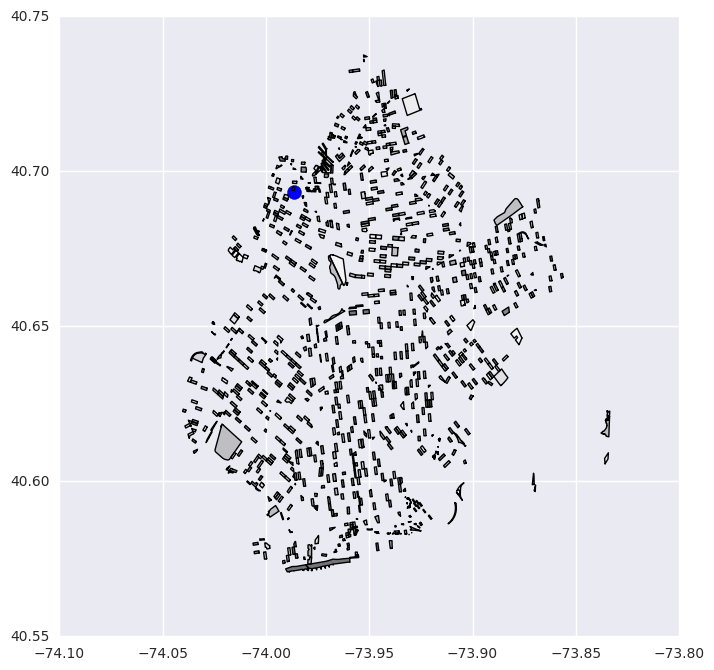

In [42]:
f, ax = plt.subplots(figsize=(8,8))
ct10_laton.plot(ax=ax)
ax.scatter(x = -73.986403, y = 40.693217, s = 100, c = 'b')